In [5]:
import pandas as pd
from PIL import Image
import requests
import numpy as np
from StringIO import StringIO
from BeautifulSoup import BeautifulSoup 
Soup = BeautifulSoup
import urllib2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [2]:
df = pd.read_csv('ign_with_img_urls.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,ign_url,image_url
0,0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12,http://ign.com/games/littlebigplanet-vita/vita...,http://pspmedia.ign.com/ps-vita/image/object/0...
1,1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12,http://ign.com/games/littlebigplanet-ps-vita-m...,http://assets2.ignimgs.com/2014/11/03/littlebi...
2,2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12,http://ign.com/games/splice/ipad-141070,http://assets2.ignimgs.com/2013/06/13/spliceip...
3,3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11,http://ign.com/games/nhl-13/xbox-360-128182,http://pcmedia.ign.com/pc/image/object/128/128...
4,4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11,http://ign.com/games/nhl-13/ps3-128181,http://pcmedia.ign.com/pc/image/object/128/128...


In [6]:
#%store -r 
image_dict = pickle.load( open( "image_dict.pickle", "rb" ) )


In [7]:
image_dict

{0: array([[[21, 33, 45],
         [21, 33, 45],
         [24, 34, 46],
         ..., 
         [24, 35, 53],
         [24, 35, 53],
         [24, 35, 53]],
 
        [[21, 33, 45],
         [21, 33, 45],
         [23, 33, 45],
         ..., 
         [24, 35, 53],
         [24, 35, 53],
         [24, 35, 53]],
 
        [[20, 32, 44],
         [21, 33, 45],
         [23, 33, 45],
         ..., 
         [24, 35, 53],
         [24, 35, 53],
         [25, 36, 54]],
 
        ..., 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ..., 
         [ 9, 10, 15],
         [ 9,  9, 17],
         [ 9,  9, 17]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ..., 
         [ 9, 10, 15],
         [ 9, 10, 15],
         [ 7, 10, 15]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ..., 
         [ 9, 10, 15],
         [ 9, 10, 15],
         [ 7, 10, 15]]], dtype=uint8), 1: array([[[21, 33, 45],
         

In [10]:
image_dict[0].shape #images are 160 x 160 x 3, the 3 is the rgb values

(160, 160, 3)

In [11]:
#Reviews are put into 10 words, they correspond to a score of 0 to 10
print df.score_phrase.unique()
print df.groupby('score_phrase')['score'].mean().sort_values()


['Amazing' 'Great' 'Good' 'Awful' 'Okay' 'Mediocre' 'Bad' 'Painful'
 'Unbearable' 'Disaster' 'Masterpiece']
score_phrase
Disaster        0.666667
Unbearable      1.290278
Painful         2.267941
Awful           3.290211
Bad             4.331600
Mediocre        5.318530
Okay            6.366553
Good            7.369099
Great           8.316510
Amazing         9.176663
Masterpiece    10.000000
Name: score, dtype: float64


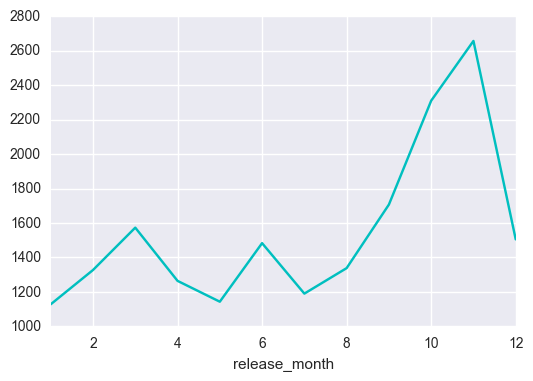

In [12]:
#October and november are the most popular time for release
df.groupby(['release_month']).size().plot(c='c')


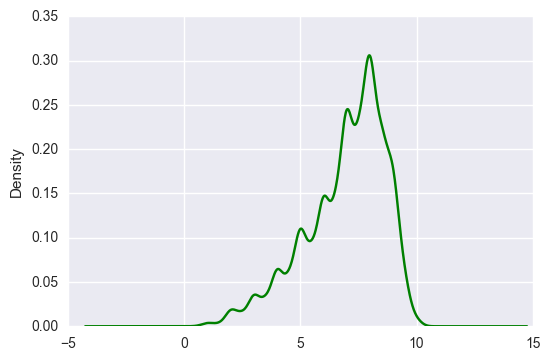

In [13]:
df.score.plot.kde(c='g', label='Density')
#Interestingly most reviews are in the 6-8 range

In [14]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,ign_url,image_url
18620,18620,18620,Good,Tokyo Mirage Sessions #FE,/games/fire-emblem-x-shin-megami-tensei/wii-u-...,Wii U,7.6,RPG,N,2016,6,29,http://ign.com/games/fire-emblem-x-shin-megami...,http://assets2.ignimgs.com/2016/03/03/tokyomir...
18621,18621,18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29,http://ign.com/games/lego-star-wars-the-force-...,http://assets1.ignimgs.com/2016/02/02/lego-sta...
18622,18622,18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28,http://ign.com/games/star-ocean-5/ps4-20035681,http://assets2.ignimgs.com/2015/09/16/star-oce...
18623,18623,18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28,http://ign.com/games/inside-playdead/xbox-one-...,http://assets1.ignimgs.com/2016/08/03/inside-b...
18624,18624,18624,Masterpiece,Inside,/games/inside-playdead/pc-20055740,PC,10.0,Adventure,Y,2016,6,28,http://ign.com/games/inside-playdead/pc-20055740,http://assets1.ignimgs.com/2016/08/03/inside-b...


In [15]:
#let's round the scores to the nearest whole number and put that in a dictionairy as well
score_dict = {}
one_hot_score_dict = {}
for index, row in df.iterrows():
    score_dict[index] = int(round(row['score']))
    if int(round(row['score'])) == 0:
        one_hot_score_dict[index] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif int(round(row['score'])) == 1:
        one_hot_score_dict[index] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif int(round(row['score'])) == 2:
        one_hot_score_dict[index] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    elif int(round(row['score'])) == 3:
        one_hot_score_dict[index] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    elif int(round(row['score'])) == 4:
        one_hot_score_dict[index] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    elif int(round(row['score'])) == 5:
        one_hot_score_dict[index] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    elif int(round(row['score'])) == 6:
        one_hot_score_dict[index] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    elif int(round(row['score'])) == 7:
        one_hot_score_dict[index] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    elif int(round(row['score'])) == 8:
        one_hot_score_dict[index] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    elif int(round(row['score'])) == 9:
        one_hot_score_dict[index] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    elif int(round(row['score'])) == 10:
        one_hot_score_dict[index] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

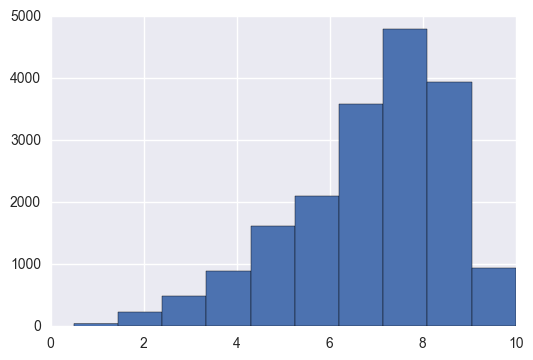

In [18]:
df.score.hist()

In [20]:
#accuracy of base guess of 8
num_right = 0
num_total = 0
for index, row in df.iterrows():
    if int(round(row['score'])) == 8:
        num_right += 1
    num_total +=1
print num_right*1.0/num_total

0.277261744966


In [21]:
#accuracy of base guess of 8
sum_of_squares = 0
for index, row in df.iterrows():
    sum_of_squares += (int(round(row['score'])) - 8)**2
        
print sum_of_squares

71484


In [16]:
#%store score_dict
#%store one_hot_score_dict


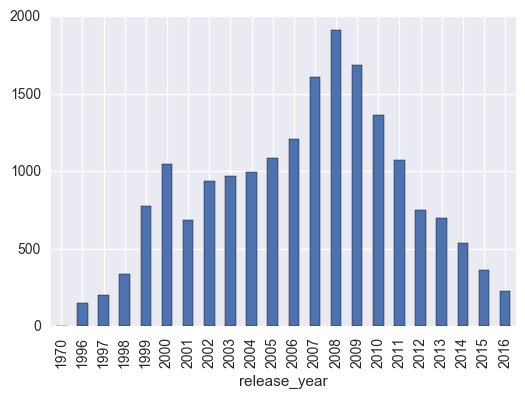

In [22]:
df.groupby(['release_year']).size().plot(kind='bar')

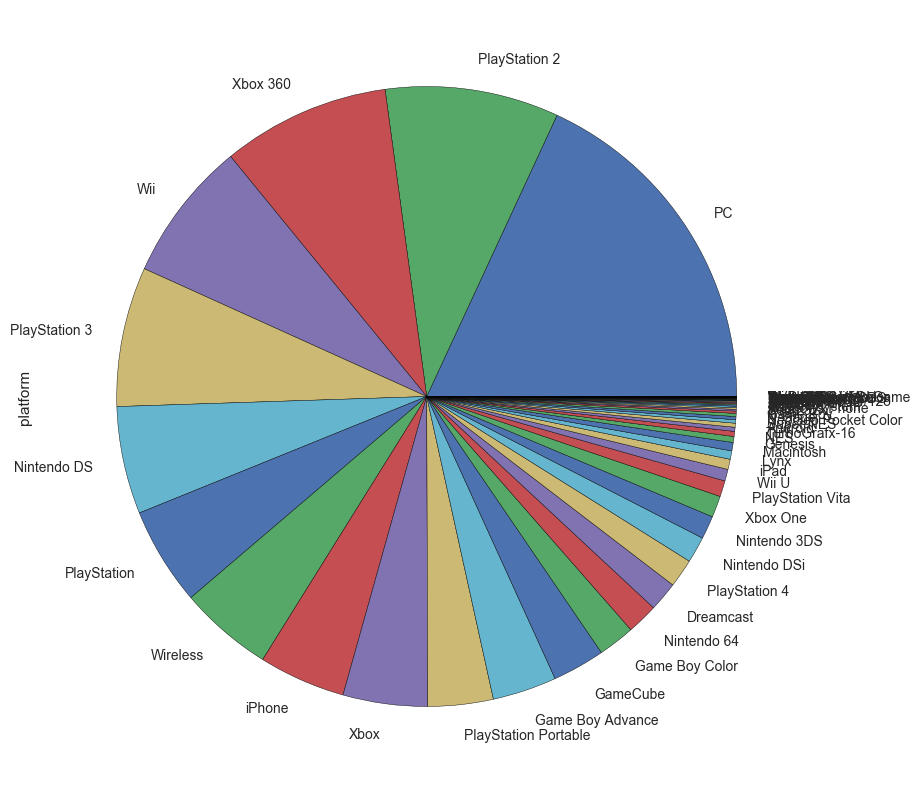

In [23]:
df.platform.value_counts().plot.pie(figsize=(10,10))
